In [1]:
import pandas as pd
import  matplotlib.pyplot as plt

url1 = 'https://raw.githubusercontent.com/iancglennon1/Data-Bootcamp-Final-Project/master'
url2 = '/NYPD_Motor_Vehicle_Collisions.csv'
url  = url1 + url2 
accidents = pd.read_csv(url) 

accidents.drop(accidents.columns[[3,4,5,6,7,8,9,10,11,22,23,24,25]], axis=1, inplace=True)
accidents['NUMBER INJURED'] = accidents['NUMBER OF PEDESTRIANS INJURED'] + accidents['NUMBER OF CYCLIST INJURED'] + accidents['NUMBER OF MOTORIST INJURED']
accidents['NUMBER KILLED'] = accidents['NUMBER OF PEDESTRIANS KILLED'] + accidents['NUMBER OF CYCLIST KILLED'] + accidents['NUMBER OF MOTORIST KILLED']
accidents['MONTH'] = pd.DatetimeIndex(accidents['DATE']).month
accidents["TIME"] = pd.to_datetime(accidents["TIME"])
accidents["HOURS"] = accidents["TIME"].dt.hour

print(accidents)

              DATE                TIME    BOROUGH  \
0       09/26/2017 2018-04-09 07:19:00        NaN   
1       09/26/2017 2018-04-09 07:15:00        NaN   
2       09/26/2017 2018-04-09 07:15:00        NaN   
3       09/26/2017 2018-04-09 07:15:00     QUEENS   
4       09/26/2017 2018-04-09 07:15:00      BRONX   
5       09/26/2017 2018-04-09 07:05:00        NaN   
6       09/26/2017 2018-04-09 07:00:00     QUEENS   
7       09/26/2017 2018-04-09 07:00:00   BROOKLYN   
8       09/26/2017 2018-04-09 07:00:00   BROOKLYN   
9       09/26/2017 2018-04-09 07:00:00      BRONX   
10      09/26/2017 2018-04-09 06:55:00     QUEENS   
11      09/26/2017 2018-04-09 06:50:00     QUEENS   
12      09/26/2017 2018-04-09 06:48:00   BROOKLYN   
13      09/26/2017 2018-04-09 06:45:00        NaN   
14      09/26/2017 2018-04-09 06:30:00   BROOKLYN   
15      09/26/2017 2018-04-09 06:26:00  MANHATTAN   
16      09/26/2017 2018-04-09 06:20:00     QUEENS   
17      09/26/2017 2018-04-09 06:13:00   BROOK

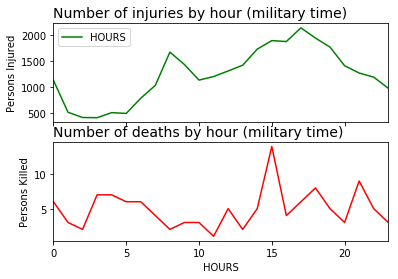

In [20]:
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True)   
accidentsbyhour['NUMBER INJURED'].plot(ax=ax[0], color='green')
ax[0].set_title('Number of injuries by hour (military time)', fontsize=14, loc='left')
ax[0].set_ylabel('Persons Injured')
ax[0].legend(['HOURS', 'Persons Injured'])  
accidentsbyhour['NUMBER KILLED'].plot(ax=ax[1], color='red')
ax[1].set_title('Number of deaths by hour (military time)', fontsize=14, loc='left')
ax[1].set_ylabel('Persons Killed')
plt.show()

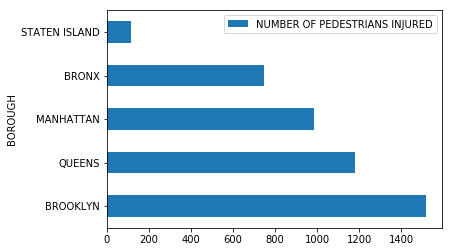

In [54]:
accidentsgrouped = accidents.groupby(['BOROUGH']).sum()
pedestinjuriesbyborough = accidentsgrouped.sort_values(by='NUMBER OF PEDESTRIANS INJURED', ascending=False)
pedestinjuriesbyborough.plot(y='NUMBER OF PEDESTRIANS INJURED',kind='barh')
plt.show()

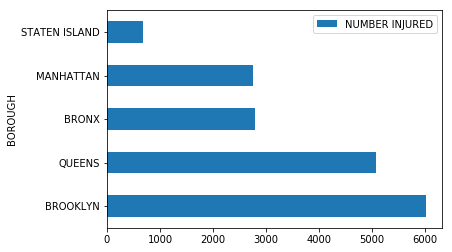

In [55]:
injuriesbyborough = accidentsgrouped.sort_values(by='NUMBER INJURED', ascending=False)
injuriesbyborough.plot(y='NUMBER INJURED',kind='barh')
plt.show()

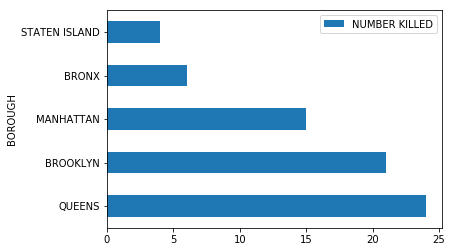

In [56]:
deathsbyborough = accidentsgrouped.sort_values(by='NUMBER KILLED', ascending=False)
deathsbyborough.plot(y='NUMBER KILLED',kind='barh')
plt.show()

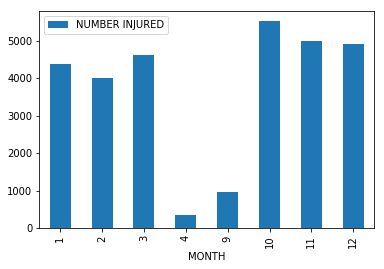

In [49]:
accidentsbymonth = accidents.groupby(['MONTH']).sum()
accidentsbymonth.plot(y='NUMBER INJURED',kind='bar')
plt.show()

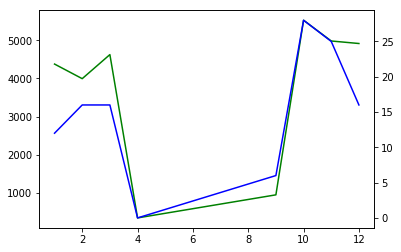

In [48]:
fig, ax1 = plt.subplots()

x = accidentsbymonth.index
y1 = accidentsbymonth['NUMBER INJURED']
y2 = accidentsbymonth['NUMBER KILLED']

ax2 = ax1.twinx()

ax1.plot(x, y1, 'g-')
ax2.plot(x, y2, 'b-')

plt.show()



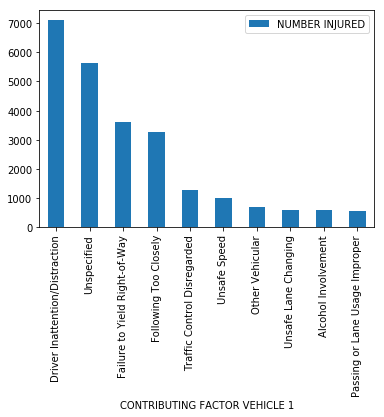

In [51]:
contributingfactor = accidents.groupby(['CONTRIBUTING FACTOR VEHICLE 1']).sum()
contributingfactor = contributingfactor.sort_values(by='NUMBER INJURED', ascending=False)
contributingfactor =contributingfactor.head(10)
contributingfactor.plot(y='NUMBER INJURED',kind='bar')
plt.show()